# SQLALCHEMY 

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new mode
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recent_date=session.query(func.max(Measurement.date)).first()
#View the date
most_recent_date

('2017-08-23')

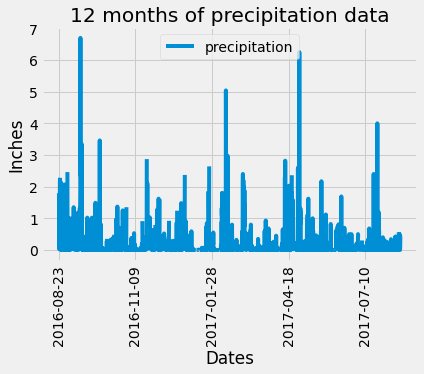

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_before=dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_before

# Perform a query to retrieve the data and precipitation scores
data_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before).all()
#View the Data
data_scores

# Save the query results as a Pandas DataFrame and set the index to the date column
dataFrame = pd.DataFrame(data_scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
dataFrame = dataFrame.sort_values("date")
#View the created Sorted Data Frame
dataFrame

# Use Pandas Plotting with Matplotlib to plot the data
dataFrame.plot(x='date', y='precipitation', rot=90)
plt.title("12 months of precipitation data")
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dataFrame.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [16]:
# Close Session
session.close()